<div style="font-family: Arial, Helvetica, sans-serif;">
    <div style="display: flex;padding-top: 20px">
        <div><strong>Môn học:</strong> Trực quan hóa dữ liệu</div>
    </div>
    <div style="display: flex;padding-top: 20px">
        <div style="padding-right: 10px;"><strong>Lớp:</strong> 22KHDL</div>
        <div></div>
    </div>
    <div>
        <div style="display: flex;padding-top: 20px">
            <div style="padding-right: 10px;"><strong>Thành viên:</strong></div>
            <div></div>
        </div>
        <table style="font-size: 15px; display:flex;padding-top: 20px">
            <tr>
                <th>No.</th>
                <th>Student ID</th>
                <th>Name</th>
            </tr>
            <tr>
                <td>1</td>
                <td>22127008</td>
                <td style="text-align:left;">Đặng Châu Anh</td>
            </tr>
            <tr>
                <td>2</td>
                <td>22127014</td>
                <td style="text-align:left;">Nguyễn Kim Anh</td>
            </tr>
            <tr>
                <td>4</td>
                <td>22127170</td>
                <td style="text-align:left;">Trần Dịu Huyền</td>
            </tr>
        </table>
    </div>
    <div style="font-size: 25px ;font-weight: 800; text-align: center;padding-top: 20px;">LAB 01</div>
    <div style="font-size: 20px ;font-weight: 800; text-align: center;padding-top: 20px;">THU THẬP DỮ LIỆU VÀ TRỰC QUAN HÓA DỮ LIỆU</div>
</div>

# **Mục lục**

- [**Giới thiệu**](#intro)
    - [Mục tiêu đồ án](#objectives)
    - [Thông tin dữ liệu](#data)
- [**Thư viện sử dụng**](#packages)
- [**Thu thập dữ liệu**](#collect)
- [**Khám phá dữ liệu**](#eda)
    - [**Tổng quan về dữ liệu**](#eda1)
    - [**EDA và tiền xử lí dữ liệu**](#eda2)
        - [**Thống kê mô tả**](#eda21)
        - [**Phân bố của dữ liệu dạng số**](#eda22)
        - [**Phân bố của dữ liệu dạng phân loại**](#eda23)
    - [**EDA và tiền xử lí dữ liệu**](#eda3)
- [**Trực quan hóa dữ liệu**](#visual)


<a id="intro"></a>
# **I. Giới thiệu**
<a id="objectives"></a>
## **1. Mục tiêu phân tích:**
- Thị hiếu âm nhạc của người nghe ở thị trường Việt Nam
<a id="data"></a>
## **2. Thông tin dữ liệu:**


<a id="packages"></a>
# **II. Thư viện sử dụng**

In [2]:
from dotenv import load_dotenv
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import NoSuchElementException, TimeoutException
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests
import re
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
import glob

<a id="collect"></a>
# **III. Thu thập dữ liệu**

Với việc thu thập được dữ liệu về các bài hát trên ứng dụng nghe nhạc trực tuyến Spotify, sau khi nhóm đã khảo sát và tìm hiểu về NhacCuaTui, nhóm đã có mục tiêu ban đầu cho việc thu thập dữ liệu là sẽ lấy tất cả các thông tin về bảng xếp hạng tại Spotify chart và bài hát mà có thể lấy được từ trang web Spotify, bao gồm:
- URI
- Tên bài hát `track_name`
- Tên ca sĩ `artist_name`
- Thể loại `genre`
- Hãng đĩa/ Nhà phát hành `source`
- Thời lượng `duration`
- Số lượt nghe `streams`

Với mục tiêu này, việc thu thập dữ liệu sẽ được thực hiện với sự hỗ trợ của thư viện `BeautifulSoup`, `requests` và `Selenium` vì đây là một trang web động, yêu cầu đăng nhập. Biến `BASE_URL` sẽ được sử dụng để lưu trữ URL của route đầu tiên của Spotify chart cần sử dụng để thu thập dữ liệu.

Đầu tiên chúng ta sẽ cài đặt ChromeDriver để sử dụng `Selenium`.

In [3]:
def initialize_chrome_driver():
   """
   Initialize Chrome WebDriver with specific configurations
   
   Args:
       user_name (str): Windows username for Chrome profile path
       
   Returns:
       webdriver.Chrome: Configured Chrome WebDriver instance
   """
   # Configure Chrome options
   chrome_options = Options()
   chrome_options.add_argument("--no-sandbox")
   chrome_options.add_argument("--start-maximized")
   
   # Configure download preferences
   chrome_options.add_experimental_option("prefs", {
       "download.default_directory": os.getcwd() + '.\\data',
       "download.prompt_for_download": False,
       "profile.default_content_setting_values.automatic_downloads": 1,
       "profile.default_content_setting_values.popups": 0,
   })
   
   # Initialize and return WebDriver
   return webdriver.Chrome(
       # Your path that contains chromedriver
       service=Service("C:/Program Files/chromedriver/chromedriver.exe"), 
       options=chrome_options
   )

Đây sẽ là phần xử lí login vào trang web Spotify chart, tên đăng nhập và mật khẩu sẽ được lưu trong file env để bảo mật thông tin.

In [21]:
def login (browser):    
    load_dotenv('.env.test')
    USER_NAME = os.getenv('USER_NAME')
    PASS_WORD = os.getenv('PASS_WORD')   
    
    login_button = WebDriverWait(browser, 10).until(
           EC.element_to_be_clickable((By.CSS_SELECTOR, "[data-testid='charts-login']"))
    )
    login_button.click()
    
    user_name = WebDriverWait(browser, 10).until(
           EC.element_to_be_clickable((By.CSS_SELECTOR, "[id='login-username']"))
    )
    user_name.click()
    user_name.send_keys(USER_NAME)
    
    pass_word = WebDriverWait(browser, 10).until(
           EC.element_to_be_clickable((By.CSS_SELECTOR, "[id='login-password']"))
    )
    pass_word.click()
    pass_word.send_keys(PASS_WORD)
    
    login = WebDriverWait(browser, 10).until(
           EC.element_to_be_clickable((By.CSS_SELECTOR, "[id='login-button']"))
    )
    login.click()
    
    WebDriverWait(browser, 10).until(EC.url_contains("https://charts.spotify.com/charts/overview/global"))

Tiếp theo chúng ta sẽ xử lí phần cookies vì nó sẽ che mất nút download

In [9]:
def handle_cookies_button(browser):
    exit_button = WebDriverWait(browser, 10).until(
           EC.element_to_be_clickable((By.CSS_SELECTOR, "[id='onetrust-close-btn-container']"))
    )
    
    exit_button.click()

Mục tiêu là thu thập dữ liệu top 200 mỗi tháng từ đầu năm 2018 đến nay, nhưng biến động giữa 1 tuần về việc ra nhạc là không nhiều nên nhóm quyết định lấy ngày đầu, ngày 15 và ngày cuối trong một tháng để thu thập dữ liệu. Nhóm sẽ lấy từ đầu năm 2018 đến cuối tháng 1 năm 2025.

Và cuối cùng chúng ta sẽ dùng Selenium để thu thập dữ liệu tự động từ trang web Spotify chart và dữ liệu sẽ được lưu tại địa chỉ `../data`

In [ ]:
def download_spotify_charts(start_month=1, start_year=2018, end_month=1, end_year=2025):
    """
    Download Spotify charts data for specified months
    
    Args:
        start_month (int): Starting month (default: 1)
        start_year (int): Starting year (default: 2024)
        end_month (int): Ending month (default: 1)
        end_year (int): Ending year (default: 2025)
    """
    # Dictionary of days in each month
    months = {1:31, 2:28, 3:31, 4:30, 5:31, 6:30, 7:31, 8:31, 9:30, 10:31, 11:30, 12:31}
    
    # Initialize Chrome
    browser = initialize_chrome_driver()
    browser.get("https://charts.spotify.com/home")
    login(browser)
    
    handle_cookies_button(browser)
    
    # Initialize tracking variables
    current_month, current_year = start_month, start_year
    
    # Process charts from start month/year to end month/year
    while (current_year < end_year) or (current_year == end_year and current_month <= end_month):
        days_to_scrape = [1, 15, months[current_month]]
        
        for day in days_to_scrape:
            url = f"https://charts.spotify.com/charts/view/regional-vn-daily/{current_year}-{current_month:02d}-{day:02d}"
            browser.get(url)
            
            try:
                download_button = WebDriverWait(browser, 10).until(
                    EC.element_to_be_clickable((By.CSS_SELECTOR, 'button[data-encore-id="buttonTertiary"]'))
                )
                download_button.click()
            except Exception as e:
                print(f"Failed to download data for {current_year}-{current_month:02d}-{day:02d}: {e}")
        
        # Update month and year tracking
        if current_month == 12:
            current_month = 1
            current_year += 1
        else:
            current_month += 1
    
    time.sleep(2)
    browser.quit()

download_spotify_charts()

Vậy là mỗi file csv đều có format tên là `regional-vn-weekly-2024-xx-xx.csv` với xx là ngày đầu, ngày 15 và ngày cuối của mỗi tháng. Tất cả các file này sẽ được lưu tại thư mục `../data` và tất cả sẽ được hợp lại thành file tên `spotify_chart.csv` và thêm cột `date` để biết được ngày thu thập dữ liệu.

In [47]:
path = '../data'
all_files = glob.glob(f"{path}/*.csv")

df_list = []

# Lấy ngày trong filename
for file in all_files:
    df = pd.read_csv(file)
    df_list.append(df)

# Hợp các dataframe lại
raw_df = pd.concat(df_list, ignore_index=True)

# Lưu dữ liệu vào file csv
raw_df.to_csv('../new_data/spotify_chart.csv', index=False)

raw_df

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,days_on_chart,streams
0,1,spotify:track:6XJsQ5nqCu8RUv9pv1iz1x,Mỹ Tâm,Người Hãy Quên Em Đi,MT Entertainment,1,1,2,22216
1,2,spotify:track:0ZP4bO2ywAv44HiEzzHaq5,"Lê Hiếu, SOOBIN, Touliver",Ngày Mai Em Đi,Space Speakers,2,2,2,12878
2,3,spotify:track:08bNPGLD8AhKpnnERrAc6G,"Marshmello, Anne-Marie",FRIENDS,Atlantic Records UK,3,4,2,9858
3,4,spotify:track:2ARqIya5NAuvFVHSN3bL0m,"Zedd, Maren Morris, Grey",The Middle,UMGRI Interscope,3,3,2,9260
4,6,spotify:track:5yFSF6qQA1rcLsQRnBsZgb,"Alan Walker, Noah Cyrus, Digital Farm Animals,...",All Falls Down (feat. Juliander),Kreatell Music,6,7,2,8471
...,...,...,...,...,...,...,...,...,...
33937,196,spotify:track:0gzpqwLf1jhNjnSJEyweAX,"Kuun Đức Nam, Linh Thộn",Tình cờ yêu em,MaiDao Music,9,167,523,17345
33938,197,spotify:track:0Lf0ydJp4nbcEkYgPtIUuD,Ronboogz,Khi Mà,MaiDao Music,122,180,170,17311
33939,198,spotify:track:5Ad2WBPQGCa9bPskbob5dN,VCC Left Hand,Mình Lượn Lờ Làm Wen (NOVINA),VCC Left Hand,198,-1,1,17229
33940,199,spotify:track:37uug3gaq86yvFTjV6WkaV,Kay Chau Anh,Think About U,Yin Yang Media,89,195,78,17215


Vậy là chúng ta đã thu thập xong được dữ liệu từ trang web Spotify chart, tiếp theo chúng ta sẽ tiếp thục thu thập các trường còn thiếu và các trường còn thiếu này sẽ được lấy từ Spotify. Việc liên kết giữa những bài hát này và chúng trên Spotify sẽ thông qua `uri` của bài hát, vì biết rằng mỗi bài hát chỉ có một URI duy nhất. Và trang web Spotify chart cũng được cung cấp thông tin từ API của Spotify.

Đầu tiên, chúng ta sẽ lấy trích lấy URI của mỗi bài hát từ `raw_df` và lưu vào biến `track_id`.

In [159]:
def extract_id(uri):
    return uri.split(':')[-1]

track_id = []
for uri in raw_df['uri']:
    track_id.append(extract_id(uri))

Tiếp theo, chúng ta sẽ sử dụng `track_id` này để lấy được thông tin bài hát từ Spotify, cụ thể là `duration` - thời lượng, `release_date` - ngày phát hành của bài hát và `streams` - tổng số lượt nghe đến thời điểm hiện tại. Nhưng trước đó chúng ta phải gom nhóm các `track_id` trùng nhau và lấy ra một `track_id` duy nhất. Đồng thời chúng ta cũng sẽ sử dụng cột `id` mới thay cho `uri` cũ với dữ liệu vừa mới được định dạng này.

In [ ]:
unique_tracks = raw_df.drop_duplicates(subset=['uri'])
track_id = unique_tracks['uri'].tolist()
track_id = [extract_id(uri) for uri in track_id]
raw_df['id'] = raw_df['uri'].apply(extract_id)
raw_df.drop(columns=['uri'], inplace=True)

Đây là hàm lấy dữ liệu của mỗi bài hát từ Spotify, chúng ta sẽ sử dụng `Selenium` để tự động quá trình này: phân tích HTML để lấy `duration`, `release_date`, dùng XPath để lấy `streams` và trả về một dictionary chứa các thông tin này.

In [7]:
def get_track_info(track_id):
    url = f"https://open.spotify.com/track/{track_id}"
    fail_request = 1
    browser = initialize_chrome_driver()
    browser.get(url)
    time.sleep(2)
    try:
        playcount_element = browser.find_element(By.CSS_SELECTOR, 'span[data-testid="playcount"]')
        
        playcount = playcount_element.text if playcount_element else 'Request failed'
    except Exception as e:
        fail_request = track_id
        print(f"Failed to get play count")
    
    browser.quit()
    
    time.sleep(1)
    try:
        response = requests.get(url)
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            release_date_tag = soup.find('meta', {'name': 'music:release_date'})
            duration_tag = soup.find('meta', {'name': 'music:duration'})
            
            release_date = release_date_tag['content'] if release_date_tag else 'Request failed'
            duration = duration_tag['content'] if duration_tag else 'Request failed'
            
            return release_date, duration, playcount, 1
        else:
            return 'Request failed', 'Request failed', 'Request failed', track_id
    except Exception as e:
        return 'Request failed', 'Request failed', 'Request failed', track_id

Tiếp theo, chúng ta sẽ lặp qua các `track_id` và gộp các thông tin vào DataFrame `raw_df`. Nhưng trong đó, như đã trình bày ở trên, chúng ta lấy dữ liệu hằng ngày nên `streams` hiện có trong `raw_df` vẫn là stream hằng ngày. Nên việc cần làm bây giờ là xóa cột `streams` và thêm cột `streams` mới với giá trị là stream cuối cùng của mỗi bài hát, tức tổng số lượt nghe đến thời điểm hiện tại. Mà thuộc tính này chúng ta sẽ thu thập ngay sau đây.

In [ ]:
# Xóa cột streams cũ
raw_df.drop(columns=['streams'], inplace=True)

# Bắt đầu thu thập dữ liệu
release_dates = []
durations = []
streams = []
fail_reqs = []

for id in track_id:
    release_date, duration, stream, fail_req = get_track_info(id)
    time.sleep(2)
    print(release_date, duration, stream)
    release_dates.append(release_date)
    durations.append(duration)
    streams.append(stream)
    fail_reqs.append(fail_req)
    
raw_df['release_date'] = release_dates
raw_df['duration'] = durations
raw_df['streams'] = streams

In [170]:
raw_df.sample(5)

,rank,artist_names,track_name,source,peak_rank,previous_rank,days_on_chart,id,release_date,duration,streams
19557,113,Sơn Tùng M-TP,Buông Đôi Tay Nhau Ra,Universal Music Indochina Distributed Labels,108,114,94,0YRtuiIMa3FM3LywGlJIii,2013-01-01,227,"20,741,034"
7790,95,Imagine Dragons,Believer,Kid Ina Korner / Interscope,72,96,284,0pqnGHJpmpxLKifKRmU6WP,2019-01-18,179,"2,476,251,414"
24443,185,BTS,Yet To Come (Hyundai Ver.),BIGHIT MUSIC,3,139,23,4ncTUgTfUV3wrjTPzKvn01,2022-09-23,224,"17,375,777"
32861,186,Wxrdie,Đau Đầu,Universal Music Indochina Distributed Labels,186,-1,1,24vkxodYasYenh3U8TUqVy,2024-11-12,224,"977,333"
11477,20,Charlie Puth,I Warned Myself,Artist Partner,20,22,10,3707IBa4HnS3zDDoWfeUBl,2019-08-27,211,"46,257,517"


Vậy là chúng ta đã hoàn thành việc thu thập dữ liệu còn thiếu từ Spotify, tiếp theo chúng ta sẽ lưu dữ liệu vào file `../data/spotify_chart_v1.csv` để tái sử dụng dữ liệu và tiến hành khám phá dữ liệu.

In [173]:
raw_df.to_csv('../new_data/spotify_chart_v1.csv', index=False, encoding='utf-8')

<a id="eda"></a>
# **IV. Khám phá dữ liệu**

Trước khi đến phần khám phá dữ liệu, chúng ta sẽ đọc dữ liệu từ file `../new_data/spotify_chart_v1.csv` đã lưu ở phần trước và bắt đầu khám phá.

In [179]:
raw_df = pd.read_csv('../new_data/spotify_chart_v1.csv', encoding='utf-8')
raw_df.head(5)

,rank,artist_names,track_name,source,peak_rank,previous_rank,days_on_chart,id,release_date,duration,streams
0,1,Mỹ Tâm,Người Hãy Quên Em Đi,MT Entertainment,1,1,2,6XJsQ5nqCu8RUv9pv1iz1x,2017-08-02,218,"23,041,707"
1,1,Mỹ Tâm,Người Hãy Quên Em Đi,MT Entertainment,1,1,18,6XJsQ5nqCu8RUv9pv1iz1x,2017-08-02,218,"23,041,707"
2,1,Mỹ Tâm,Người Hãy Quên Em Đi,MT Entertainment,1,1,19,6XJsQ5nqCu8RUv9pv1iz1x,2017-08-02,218,"23,041,707"
3,1,Mỹ Tâm,Người Hãy Quên Em Đi,MT Entertainment,1,1,33,6XJsQ5nqCu8RUv9pv1iz1x,2017-08-02,218,"23,041,707"
4,1,Mỹ Tâm,Người Hãy Quên Em Đi,MT Entertainment,1,1,48,6XJsQ5nqCu8RUv9pv1iz1x,2017-08-02,218,"23,041,707"


<a id="eda1"></a>
## **1. Tổng quan về dữ liệu**

Ở phần này thì chúng ta sẽ khám phá về cấu trúc của dữ liệu. Đầu tiên, chúng ta sẽ kiểm tra số dòng và số cột của dữ liệu để chắc rằng dữ liệu phù hợp với yêu cầu về cấu trúc của bài (hơn 3000 dòng trước tiền xử lí).

**Kích thước dữ liệu:**

In [6]:
print(f"Number of rows: {raw_df.shape[0]}")
print(f"Number of columns: {raw_df.shape[1]}")

Number of rows: 20276
Number of columns: 8


Dữ liệu đã đạt yêu cầu của đề, tuy nhiên, ta thấy lặp khá nhiều dữ liệu của một bài hát (tức một record) do việc thu thập dữ liệu từ bảng xếp hạng hàng ngày. Vì vậy, chúng ta sẽ tiến hành xử lí dữ liệu trùng lặp này bằng cách giữ lại duy nhất một record cho mỗi `id` bài hát với `days_on_chart` lớn nhất, tức số ngày bài hát đứng trên bảng xếp hạng cuối cùng.

In [ ]:
raw_df = raw_df.loc[raw_df.groupby('id')['days_on_chart'].idxmax()].reset_index(drop=True)

print(f"Number of rows: {raw_df.shape[0]}")
print(f"Number of columns: {raw_df.shape[1]}")

display(raw_df.head())

Number of rows: 3487
Number of columns: 11


,rank,artist_names,track_name,source,peak_rank,previous_rank,days_on_chart,id,release_date,duration,streams
0,73,Red Velvet,RBB (Really Bad Boy),SM Entertainment,14,79,15,006LuHbY5Tt9dhbdSOnVq6,2018-12-14,212,"646,798,750"
1,68,"Post Malone, The Weeknd",One Right Now (with The Weeknd),Republic Records,39,60,27,00Blm7zeNqgYLPtW6zg8cj,2021-11-05,194,"685,454,538"
2,147,j-hope,Safety Zone,BIGHIT MUSIC,15,168,18,00I41xsW6SunZDJ5fB8KAd,2022-07-15,165,"43,608,495"
3,150,"Chillies, SUNI, Rhymastic",Cứ Chill Thôi,WM Vietnam,4,86,1272,014DA3BdnmD3kI5pBogH7c,2020-07-24,240,"1,574,927,209"
4,119,"Da LAB, JGKiD (Da LAB), MPaKK",CILU,Yin Yang Media,66,99,31,0167mYf0UIa3qBqy4NZgt5,2021-02-21,282,"730,068"


Số lượng record sau khi xử lí trùng lặp sẽ giảm đi rất nhiều, nhưng vẫn đảm bảo đủ dữ liệu cho việc khám phá và trực quan hóa dữ liệu theo yêu cầu của đề.

Tiếp theo, chúng ta sẽ kiểm tra xem kiểu dữ liệu của các cột trong dữ liệu để biết được cần phải xử lí kiểu dữ liệu của các cột nào trong dữ liệu ở phần tiền xử lí.

**Kiểu dữ liệu của các cột:**

In [183]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3487 entries, 0 to 3486
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           3487 non-null   int64 
 1   artist_names   3487 non-null   object
 2   track_name     3487 non-null   object
 3   source         3487 non-null   object
 4   peak_rank      3487 non-null   int64 
 5   previous_rank  3487 non-null   int64 
 6   days_on_chart  3487 non-null   int64 
 7   id             3487 non-null   object
 8   release_date   3487 non-null   object
 9   duration       3487 non-null   int64 
 10  streams        3487 non-null   object
dtypes: int64(5), object(6)
memory usage: 299.8+ KB


**Thông tin về các cột trong dữ liệu**

Chúng ta có 11 cột trong dữ liệu, với tất cả các cột đều có kiểu dữ liệu khác nhau:
Ý nghĩa của các cột trong dữ liệu như sau:
| Tên cột     | Ý nghĩa                           | Kiểu dữ liệu       |
|-----------------|---------------------------------------|-----------------|
| rank            | Đường dẫn của bài hát                 | Numeric         |
| artist_name     | Tên ca sĩ                             | Categorical     |
| track_name      | Tên bài hát                           | Categorical     |
| source          | Hãng đĩa/ Nhà phát hành               | Categorical     |
| peak_rank       | Hạng cao nhất của bài hát             | Numeric         |
| previous_rank   | Hạng trước đó của bài hát             | Numeric         |
| days_on_chart   | Số ngày bài hát đứng trên bảng xếp hạng | Numeric         |
| id              | Mã bài hát                            | Categorical     |
| release_date    | Ngày phát hành bài hát                | Categorical     |
| duration        | Thời lượng bài hát                    | Numeric         |
| streams         | Số lượt nghe của bài hát              | Numeric         |

Vậy cũng có nghĩa là, mỗi hàng trong dữ liệu sẽ chứa thông tin về một bài hát.

**Kiểm tra dữ liệu bị thiếu**

Ở phần này, chúng ta sẽ kiểm tra xem dữ liệu có bị thiếu không, nếu có thì chúng ta sẽ xử lí dữ liệu bị thiếu ở phần tiền xử lí để làm sạch dữ liệu.

In [184]:
print('Giá trị thiếu trong mỗi cột:')
print(raw_df.isnull().sum())

Giá trị thiếu trong mỗi cột:
rank             0
artist_names     0
track_name       0
source           0
peak_rank        0
previous_rank    0
days_on_chart    0
id               0
release_date     0
duration         0
streams          0
dtype: int64


Rất may mắn là chúng ta không có dữ liệu nào bị thiếu ở mỗi trường. Tuy nhiên do việc thu thập dữ liệu có thể gặp lỗi nên chúng ta sẽ kiểm tra xem các cột `release_date` và `duration` và `streams` có giá trị không hợp lý không ở phần sau.

**Kiểm tra dữ liệu bị trùng**

Ở phần này, chúng ta sẽ kiểm tra xem dữ liệu có bị trùng không, nếu có thì chúng ta sẽ xóa dữ liệu trùng.

In [185]:
print('Dữ liệu trùng lặp:')
print(raw_df.duplicated().sum())

Dữ liệu trùng lặp:
0


Vậy là giai đoạn thu thập dữ liệu làm khá tốt, không có dữ liệu bị trùng. Tiếp theo, chúng ta sẽ tiến hành khám phá xem có bao nhiêu giá trị khác nhau trong mỗi cột. Điều này nhằm giúp chúng ta hiểu rõ hơn về dữ liệu, đặc biệt là về `artist_names`, `track_name`, `source` để có cái nhìn tổng quan về dữ liệu.

In [186]:
for col in ['artist_names', 'track_name', 'source']:
    print(f"{col}: {raw_df[col].nunique()} giá trị khác nhau")

artist_names: 1558 giá trị khác nhau
track_name: 2911 giá trị khác nhau
source: 572 giá trị khác nhau


<a id="eda2"></a>
## **2. EDA và Tiền xử lí dữ liệu**

Phần này chúng ta sẽ phân tích sâu hơn về tập dữ liệu để khám phá mẫu, phân phối và mối quan hệ giữa các biến.

Đầu tiên, chúng ta sẽ đảm bảo rằng các trường dữ liệu được chuyển sang kiểu dữ liệu hợp lí của nó. Liệu tất cả các trường đều thích hợp với kiểu dữ liệu phân loại không? Để trả lời câu hỏi này, chúng ta sẽ xem lại dữ liệu.

In [187]:
raw_df.head(5)

,rank,artist_names,track_name,source,peak_rank,previous_rank,days_on_chart,id,release_date,duration,streams
0,73,Red Velvet,RBB (Really Bad Boy),SM Entertainment,14,79,15,006LuHbY5Tt9dhbdSOnVq6,2018-12-14,212,"646,798,750"
1,68,"Post Malone, The Weeknd",One Right Now (with The Weeknd),Republic Records,39,60,27,00Blm7zeNqgYLPtW6zg8cj,2021-11-05,194,"685,454,538"
2,147,j-hope,Safety Zone,BIGHIT MUSIC,15,168,18,00I41xsW6SunZDJ5fB8KAd,2022-07-15,165,"43,608,495"
3,150,"Chillies, SUNI, Rhymastic",Cứ Chill Thôi,WM Vietnam,4,86,1272,014DA3BdnmD3kI5pBogH7c,2020-07-24,240,"1,574,927,209"
4,119,"Da LAB, JGKiD (Da LAB), MPaKK",CILU,Yin Yang Media,66,99,31,0167mYf0UIa3qBqy4NZgt5,2021-02-21,282,"730,068"


In [194]:
for col in raw_df.columns:
    print(f"{col.ljust(20)}: \t\t{type(raw_df[col][0])}")

rank                : 		<class 'numpy.int64'>
artist_names        : 		<class 'str'>
track_name          : 		<class 'str'>
source              : 		<class 'str'>
peak_rank           : 		<class 'numpy.int64'>
previous_rank       : 		<class 'numpy.int64'>
days_on_chart       : 		<class 'numpy.int64'>
id                  : 		<class 'str'>
release_date        : 		<class 'str'>
duration            : 		<class 'numpy.int64'>
streams             : 		<class 'str'>


Chúng ta có thể phát hiện thấy có một số kiểu dữ liệu không hợp lí ở đây.
- `rank`, `peak_rank`, `previous_rank` là dữ liệu dạng ordinal và không phải dạng số nên chúng ta sẽ chuyển chúng về dạng phân loại - object.

In [196]:
raw_df['rank'] = raw_df['rank'].astype('object')
raw_df['peak_rank'] = raw_df['peak_rank'].astype('object')
raw_df['previous_rank'] = raw_df['previous_rank'].astype('object')

- `release_date` là dữ liệu dạng ngày tháng nên chúng ta sẽ chuyển nó về dạng datetime.

In [197]:
raw_df['release_date'] = pd.to_datetime(raw_df['release_date'])

- `streams` là dữ liệu dạng số nguyên nhưng hiện tại đang là string nên chúng ta sẽ chuyển nó về dạng số nguyên.

In [ ]:
raw_df['streams'] = raw_df['streams'].str.replace(",", "").astype('int64')

Nhìn lại các kiểu dữ liệu.

In [203]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3487 entries, 0 to 3486
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   rank           3487 non-null   object        
 1   artist_names   3487 non-null   object        
 2   track_name     3487 non-null   object        
 3   source         3487 non-null   object        
 4   peak_rank      3487 non-null   object        
 5   previous_rank  3487 non-null   object        
 6   days_on_chart  3487 non-null   int64         
 7   id             3487 non-null   object        
 8   release_date   3487 non-null   datetime64[ns]
 9   duration       3487 non-null   int64         
 10  streams        3487 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 299.8+ KB


Vậy là mọi kiểu dữ liệu của mỗi trường đã hợp lí. Chúng sẽ tiếp tục khám phá về dữ liệu.

Như đã trình bày ở trên, các trường `release_date`, `duration` và `streams` cần phải được kiểm tra giá trị không hợp lý do có thể không có dữ liệu ở một số record. Chúng ta sẽ kiểm tra giá trị của các trường này để xem xét cần phải xử lí dữ liệu không. Tuy nhiên dữ liệu bị thiếu không thể chỉ phát hiện bằng hàm `isna()` mà còn phải kiểm tra xem có giá trị `Request failed` hay không (đã được quy định khi thu thập dữ liệu, nếu không có dữ liệu thì sẽ trả về `Request failed`).

In [205]:
missing_release_date = raw_df['release_date'].isna() | (raw_df['release_date'] == 'Request failed')
missing_duration = raw_df['duration'].isna() | (raw_df['duration'] == 'Request failed')
missing_streams = raw_df['streams'].isna() | (raw_df['streams'] == 'Request failed')

print(f"Số giá trị thiếu release_date: {missing_release_date.sum()}")
print(f"Số giá trị thiếu duration: {missing_duration.sum()}")
print(f"Số giá trị thiếu streams: {missing_streams.sum()}")

Số giá trị thiếu release_date: 0
Số giá trị thiếu duration: 0
Số giá trị thiếu streams: 0


May mắn là không có dữ liệu bị thiếu ở các trường `release_date`, `duration` và `streams`. Vậy là chúng ta đã xử lí xong dữ liệu bị thiếu, theo như đã tìm hiểu ở trên thì bộ dữ liệu cũng không còn dữ liệu trùng nên chúng ta sẽ tiếp tục khám phá dữ liệu. Đầu tiên chúng ta sẽ xem lại dữ liệu sau khi xử lí.

In [206]:
raw_df.sample(5)

,rank,artist_names,track_name,source,peak_rank,previous_rank,days_on_chart,id,release_date,duration,streams
2510,194,"SUNI, Lou Hoàng","Không Sao Mà, Em Đây Rồi",Mustation Entertainment,193,-1,3,5SzRpDS2jfB3Zl6uQL5HCQ,2019-07-25,268,12677065
2864,92,"The Chainsmokers, Kelsea Ballerini",This Feeling,Disruptor Records/Columbia,12,71,71,6LKYeyLt4G4SlZ6OJwFhVS,2017-03-18,220,3067631
3148,62,The Weeknd,Wasted Times,Universal Republic Records,62,92,3,72TyiiduRmczEbDIEtKQdR,2018-03-16,194,473113073
2217,193,Adele,Hello,XL Recordings,193,-1,1,4sPmO7WMQUAf45kwMOtONw,2016-06-09,221,230239772
2468,173,Jung Kook,Hate You,BIGHIT MUSIC,8,130,29,5ONOlTiqymhzwcFjqcIT6E,2023-11-03,154,147686642


Có vẻ như dữ liệu hiện tại cần được đổi vị trí của các cột: cột `id` sẽ lên đầu tiên từ trái sang, cột `rank` sẽ đặt sau `days_on_chart` và `release_date`, `duration` sẽ dời lên trên các thứ hạng để có thể dễ quan sát hơn. Vậy chúng ta sẽ tiến hành đổi vị trí của các cột theo thứu tự: `id`, `track_name`, `artist_name`, `source`, `release_date`, `duration`, `peak_rank`, `previous_rank`, `days_on_chart`, `rank`, `streams`.

In [208]:
col_order = ['id', 'track_name', 'artist_names', 'source', 'release_date', 'duration', 'peak_rank', 'previous_rank', 'days_on_chart', 'rank', 'streams']
raw_df = raw_df[col_order]
raw_df.sample(5)

,id,track_name,artist_names,source,release_date,duration,peak_rank,previous_rank,days_on_chart,rank,streams
218,0VWHhUe3OxsnLDFnMMhjJM,Lonely Stonie,Wxrdie,Universal Music Indochina Distributed Labels,2024-11-12,186,138,164,3,180,1045378
1865,460WMeltK2dxce4qhcaCF7,Normal No More,TYSM,EFFESS,2020-04-17,200,68,164,73,157,16700731
1157,2YlZnw2ikdb837oKMKjBkW,Like I'm Gonna Lose You (feat. John Legend),"Meghan Trainor, John Legend",Epic,2012-05-01,282,87,-1,32,184,207169
1850,44ADyYoY5liaRa3EOAl4uf,Slide Away,Miley Cyrus,RCA/Legacy,2019-08-23,287,29,-1,45,177,382453045
2773,69CA72t8PPWgEFExXhuqII,Trống Cơm,"Cường Seven, SOOBIN, Tự Long",Universal Music Indochina Distributed Labels,2024-07-27,254,64,112,18,131,2680851


<a id="eda21"></a>
### **Thống kê mô tả**

Tiếp theo, chúng ta sẽ phân tích sâu hơn về tập dữ liệu để khám phá mẫu, phân phối và mối quan hệ giữa các biến.

Đầu tiên, chúng ta sẽ xem xét các thống kê mô tả cho các cột để có các giá trị: trung bình (mean), trung vị (median), giá trị nhỏ nhất (min), giá trị lớn nhất (max), tứ phân vị (quartile) của các cột dạng số. Chúng ta không cần lo lắng về giá trị bị thiếu ở các trường này vì đã xử lí ở phần trên.

In [210]:
# Trích các cột số
num_cols = raw_df.select_dtypes(include=np.number).columns

# Xem thống kê mô tả
raw_df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
duration,3487.0,2.141764e+02,4.627432e+01,35.0,185.0,209.0,238.0,6.130000e+02
days_on_chart,3487.0,1.521517e+02,2.658278e+02,1.0,11.0,44.0,162.0,2.483000e+03
streams,3487.0,3.671169e+08,6.274778e+08,16502.0,7478557.5,65682180.0,425674096.0,4.727747e+09


<a id="eda22"></a>
### **Phân bố của dữ liệu dạng số**

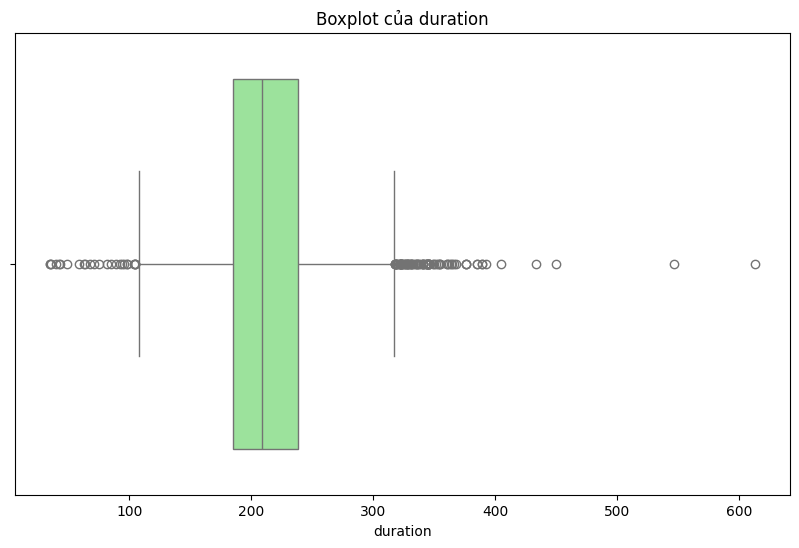

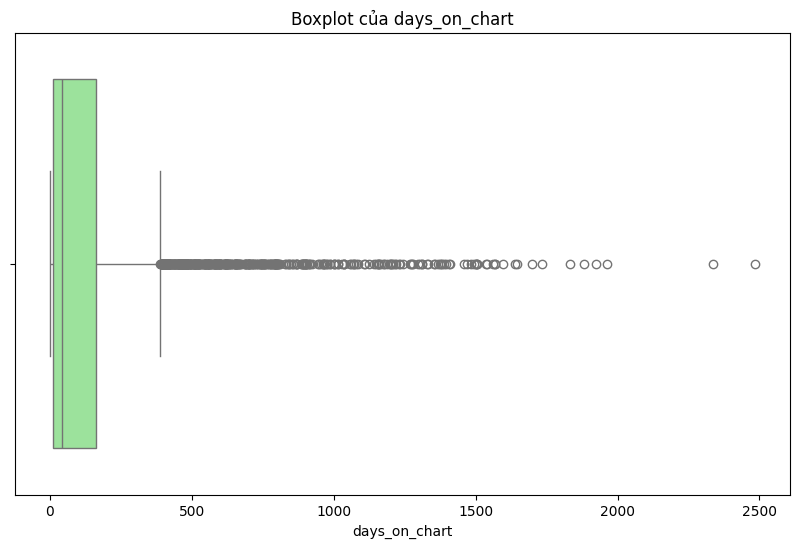

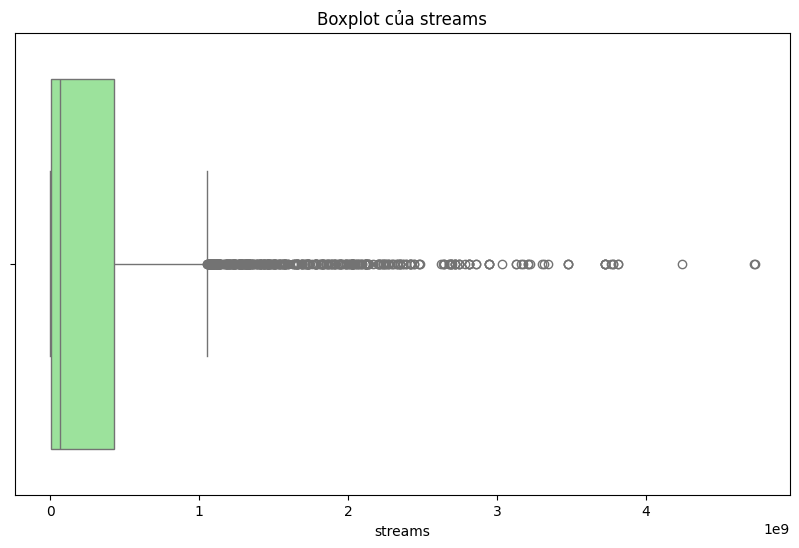

In [215]:
for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=raw_df[col], color='lightgreen')
    plt.title(f'Boxplot của {col}')
    plt.show()

    # Tính toán IQR cho từng cột
    Q1 = raw_df[col].quantile(0.25)
    Q3 = raw_df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = raw_df[(raw_df[col] < lower_bound) | (raw_df[col] > upper_bound)]
    if outliers.empty:
        print(f"Không có giá trị ngoại lai nào tìm được cho {col}")

Chúng ta có thể thấy dữ liệu dạng số có nhiều giá trị ngoại lai nhất là với `streams` và `days_on_chart`. Với các giá trị ngoại lai như trên ta có thể thấy được các giá trị ngoại lai này có thể ảnh hưởng đến phân bố. Tuy nhiên là chúng ta sẽ không xử lí các giá trị ngoại lai (loại bỏ nó hay scale lại) này ở đây mà sẽ phân tích kĩ hơn ở phần sau.

<a id="eda23"></a>
### **Phân bố của dữ liệu dạng phân loại**

Chúng ta đã kiểm tra dữ liệu thiếu ở phần trước nên phần này không phải bận tâm về nó nữa (missing_ratio = 0%). Đầu tiên chúng ta sẽ tính các giá trị như sau:
- Số lượng giá trị khác nhau trong mỗi trường, không tính giá trị thiếu: `num_values`
- Tỉ lệ các giá trị khác nhau trong mỗi trường, không tính giá trị thiếu: `value_ratios`

In [216]:
# Tìm các trường thuộc kiểu phân loại
categorical_cols = raw_df.select_dtypes(include=['object']).columns.tolist()

cat_col_info = {}

# Tính toán
for col in categorical_cols:    
    num_values = raw_df[col].nunique(dropna = True)
    
    # Tính số các giá trị và tỉ lệ giá trị
    value_ratio = (np.round(raw_df[col].value_counts(normalize=True, ascending=False) * 100, 1)).to_dict()
    
    cat_col_info[col] = {
        "num_values": num_values,
        "value_ratio": value_ratio
    }
    
cat_col_info_df = pd.DataFrame(cat_col_info)
cat_col_info_df.T

,num_values,value_ratio
id,3487,"{'006LuHbY5Tt9dhbdSOnVq6': 0.0, '569B75eNRVDAB..."
track_name,2911,"{'Mượn Rượu Tỏ Tình': 0.1, 'Sunflower - Spider..."
artist_names,1558,"{'BTS': 3.8, 'Taylor Swift': 2.6, 'BLACKPINK':..."
source,572,"{'BIGHIT MUSIC': 7.3, 'Yin Yang Media': 6.2, '..."
peak_rank,199,"{1: 7.0, 2: 3.8, 5: 3.0, 3: 2.5, 4: 2.0, 7: 2...."
previous_rank,201,"{-1: 15.6, 180: 1.0, 177: 0.9, 168: 0.9, 182: ..."
rank,200,"{191: 1.6, 199: 1.5, 200: 1.5, 196: 1.5, 195: ..."


Có vẻ như có một số bất thường trong dữ liệu. Từ dataframe trên, chúng ta có thể có được một số thông tin về bộ dữ liệu như sau:
- Bất thường là có 3487 id khác nhau nhưng chỉ có 2911 tên bài hát.
- Có 1558 nghệ sĩ trong bộ dữ liệu với tần suất xuất hiện cao nhất là "BTS" với 3.8%.
- Có nhiều hãng đĩa (572 hãng), nhưng hãng đĩa sản xuất cho nhiều bài hát nhất thuộc về "BIGHIT MUSIC" với 7.3% cho `value_ratios`.
- Có quá nhiều thứ hạng trùng nhau trong `rank`. Lưu ý là chúng ta đã sử dụng tổng số lượt nghe `streams` thay vì lượt nghe hàng ngày ban đầu. Nên trường `rank` này không còn ý nghĩa nữa. Vậy nên chúng ta sẽ định nghĩa lại trường `rank` theo thứ hạng cuối cùng của mỗi bài hát, trức là theo `streams` hiện tại.

**Kiểm tra bất thường:**

Ta có thể đoán rằng có lẽ là do có các bài hát trùng tên với nhau dẫn đến việc có số các tên bài khác nhau khác với số các url. Để kiểm tra giả thuyết này, chúng ta sẽ kiểm tra xem có bài hát nào trùng tên với nhau không.

In [218]:
duplicate_names = raw_df[raw_df.duplicated('track_name', keep=False)]
print("Tổng số các bài hát trùng tên:", len(duplicate_names))

duplicate_num = raw_df.groupby('track_name').size().reset_index(name='count')
duplicate_num = duplicate_num[duplicate_num['count'] > 1]

print("Bài hát trùng tên và số lần trùng:")
print(duplicate_num)

Tổng số các bài hát trùng tên: 1061
Bài hát trùng tên và số lần trùng:
                           track_name  count
8                00:00 (Zero O’Clock)      2
18                             1 Phút      3
22                        10 Ngàn Năm      2
36                               2002      2
40                                24h      2
...                               ...    ...
2862            Để Mị Nói Cho Mà Nghe      2
2868                         Độ Tộc 2      2
2888                   đưa em về nhàa      2
2890  để tôi ôm em bằng giai điệu này      2
2903                               是你      2

[485 rows x 2 columns]


Kiểm tra lại số liệu xem có khớp không

In [220]:
print(len(duplicate_names) + 2911 - len(duplicate_num)) # 2911 là số bài hát khác nhau

3487


Vậy lí do là do có nhiều bài hát trùng tên (`num_values` của `track_name` bằng 3487). Nên không có gì bất thường ở đây. Tiếp theo chúng ta sẽ đi đến bất thường ở cột `streams`

**Xử lí bất thường:**

Chúng ta sẽ dùng trường `streams` để xác định thứ hạng cuối cùng của mỗi bài hát. Thông qua việc giá trị của `rank` sẽ theo thứ tự tăng dần theo giá trị của `streams`. Vậy nên chúng ta sẽ sắp xếp lại dữ liệu theo thứ tự giảm dần của `streams` và lấy giá trị cuối cùng của `rank` của mỗi bài hát. Vậy là chúng ta đã xử lí xong bất thường ở trường `rank`.

In [231]:
raw_df = raw_df.sort_values(by='streams', ascending=False).reset_index(drop=True)
raw_df['rank'] = raw_df['streams'].rank(method='first', ascending=False).astype('int64').astype('object')
raw_df.head()

,id,track_name,artist_names,source,release_date,duration,peak_rank,previous_rank,days_on_chart,rank,streams
0,3Z0oQ8r78OUaHvGPiDBR3W,Into the Unknown,"Idina Menzel, AURORA",Walt Disney Records,2019-11-29,202,50,145,23,1,4727746591
1,3AzjcOeAmA57TIOr9zF1ZW,Physical,Dua Lipa,Warner Records,2020-03-20,200,15,149,105,2,4726263786
2,5CLGzJsGqhCEECcpnFQA8x,"These Days (feat. Jess Glynne, Macklemore & Da...","Rudimental, Jess Glynne, Macklemore, Dan Caplen",Atlantic Records UK,2017-03-03,234,14,-1,86,3,4238338469
3,42zePe03Iq8tvFcJAIKkp8,D.R.E.A.M. (feat. Ghostface Killah),"Miley Cyrus, Ghostface Killah",RCA/Legacy,2019-05-17,182,59,59,2,4,3812743107
4,34ODRRWSsRbiB6sGI9R9Te,Badadu,MONSTAR,ST.319 Entertainment,2018-11-08,182,45,179,40,5,3811491910


Vậy là chúng đã xử lí các bất thường và cũng như là khám phá và tiền xử lí dữ liệu xong. Bộ dữ liệu mới sẽ được lưu vào file csv để sử dụng ở phần tiếp theo.

In [232]:
raw_df.to_csv('../new_data/cleaned_data.csv', index=False, encoding='utf-8')
raw_df.sample(5)

,id,track_name,artist_names,source,release_date,duration,peak_rank,previous_rank,days_on_chart,rank,streams
1799,5kRTXjVcdAHNCCbiUtJZTR,Tình Đắng Như Ly Cà Phê,"Ngơ, NÂN",12 trái lê,2019-09-12,163,74,103,183,1800,52985474
114,6WbADFqMvR8N5u0BvtsWQE,Without You (feat. Sandro Cavazza),"Avicii, Sandro Cavazza",Universal Music AB,2018-04-27,231,1,109,36,115,2064219143
381,1Axzkl935WrIsBwDqk90yQ,Đưa Nhau Đi Trốn - Chill Version,"Đen, Linh Cáo",Đen,2019-10-04,168,69,125,507,382,1125552324
2030,1nwdfbj4UyRMpa9L98a4Yi,Blue Side,j-hope,BIGHIT MUSIC,2021-03-02,199,7,190,9,2031,26746964
3411,42rme4MN6ki6mXgl4yaZtV,Tầng Thượng 102,Cá Hồi Hoang,Luke Record,2020-09-15,141,183,-1,9,3412,454534


<div id='analysis'></div>

# **V. Phân tích dữ liệu và trực quan hóa**

In [ ]:
df = pd.read_csv('../new_data/cleaned_data.csv', encoding='utf-8')
df.head(5)

,id,track_name,artist_names,source,release_date,duration,peak_rank,previous_rank,days_on_chart,rank,streams
0,3Z0oQ8r78OUaHvGPiDBR3W,Into the Unknown,"Idina Menzel, AURORA",Walt Disney Records,2019-11-29,202,50,145,23,1,4727746591
1,3AzjcOeAmA57TIOr9zF1ZW,Physical,Dua Lipa,Warner Records,2020-03-20,200,15,149,105,2,4726263786
2,5CLGzJsGqhCEECcpnFQA8x,"These Days (feat. Jess Glynne, Macklemore & Da...","Rudimental, Jess Glynne, Macklemore, Dan Caplen",Atlantic Records UK,2017-03-03,234,14,-1,86,3,4238338469
3,42zePe03Iq8tvFcJAIKkp8,D.R.E.A.M. (feat. Ghostface Killah),"Miley Cyrus, Ghostface Killah",RCA/Legacy,2019-05-17,182,59,59,2,4,3812743107
4,34ODRRWSsRbiB6sGI9R9Te,Badadu,MONSTAR,ST.319 Entertainment,2018-11-08,182,45,179,40,5,3811491910


Mục tiêu phân tích của nhóm như đã nêu từ đầu là xu hướng thị hiếu âm nhạc của người nghe ở thị trường Việt Nam. Để có thể có cái nhìn đúng về thị trường âm nhạc trực tuyến ở Việt Nam hiện nay, chúng ta phải biết được mối quan hệ giữa các yếu tố âm nhạc dẫn đến sự thịnh hành của các bài hát. Vì vậy, đầu tiên chúng ta sẽ xem xét liệu đâu là các thể loại nhạc phổ biến nhất ở Việt Nam bằng cách xem xét số lượng bài hát của từng thể loại nhạc, để trả lời cho câu hỏi:
## **1. Mức độ ảnh hưởng của thể loại âm nhạc đến sự thịnh hành của bài hát**
### **1.1. Các thể loại nhạc nào thịnh hành nhất ở Việt Nam?**

Để có thể làm điều này, chúng ta sẽ xem xét các bài hát nằm trong `top_50_df`, trích id - `url` của các bài hát này và so sánh với `df` để xem xem bài hát nào nằm trong bảng xếp hạng. Sau đó, chúng ta sẽ xem xét số lượng bài hát của từng thể loại nhạc.

Số lượng bài hát của từng thể loại nhạc nằm trong top 50 thịnh hành:
        genre  count
0    Nhạc Trẻ     24
1    Rap Việt     13
2  Remix Việt      8
3    Nhạc Hàn      3
4         Pop      1


[Plot chart cho thể loại thịnh hành]

Như đã thấy, các thể loại đang thịnh hành hiện nay là Nhạc Trẻ, Rap, Remix, Nhạc Hàn và Pop. Vậy liệu các thể loại này thịnh hành hơn do có nhiều bài hát trên các nền tảng trực tuyến hơn làm ảnh hưởng đến quyết định chọn nhạc của người nghe, hay là do thị hiếu chung của người nghe nhạc trực tuyến tại Việt Nam.
### **1.2. Sự hiện diện của các thể loại âm nhạc trên thị trường âm nhạc Việt Nam**
Để trả lời cho câu hỏi này, chúng ta sẽ xem xét số lượng bài hát của từng thể loại nhạc trong `df`.

[Tự thêm markdown và biểu đồ]

In [34]:
df['genre'].value_counts()

genre
Rap Việt             1009
Remix Việt           1004
Nhạc Hàn             1001
Blues/Jazz           1000
Latin                1000
Country              1000
Trữ Tình             1000
R&B/Hip Hop/Rap       999
Nhạc Thái             999
Thiếu Nhi             999
Tiền Chiến            999
Cách Mạng             998
Nhạc Hoa              998
Nhạc Nhật             998
Rock Việt             997
Nhạc Trịnh            996
Indie                 931
Rock                  775
Beat                  714
Electronica/Dance     630
Không Lời             509
Nhạc Trẻ              438
Pop                   155
Thể Loại Khác         120
Name: count, dtype: int64

Nhạc Trẻ là thể loại nằm trong bảng xếp hạng thịnh hành hiện nay nhiều nhất nhưng số lượng bài hát có trên trang web trực tuyến này ít hơn nhiều lần so với các thể loại như Rap Việt và Remix Việt. Vậy có nghĩa là người nghe không phải hoàn toàn chọn nhạc do ảnh hưởng từ số lượng bài hát của một bên nào áp đảo mà là do thị hiếu cá nhân của họ. Hoặc cũng có thể là do đây không phải là kênh nhạc trực tuyến người nghe chọn để nghe Rap Việt và Remix Việt nhiều.

Tuy nhiên để có thể biết được rõ ràng hơn về thể loại nhạc ảnh hưởng thế nào đến thị hiếu của người nghe, chúng ta cần phải xem xét thêm ở một bang xếp hạng có thời gian dài hơn và có nhiều bài hát hơn và NhacCuaTui không cung cấp lượt nghe. Nên nhóm sẽ thu thập thêm dữ liệu từ trang Kworb (nơi cung cấp bảng xếp hạng âm nhạc trên nền tảng Spotify, Itunes, Youtube...) để có cái nhìn rõ hơn về điều này.

[Scrape từ trang https://kworb.net/spotify/country/vn_daily_totals.html Đã có làm rồi ở project trước, đồng thời khi scrape đc về rồi lưu ý là id trên trang này tương đương id trên spotify nên là xử lí chuỗi để có thể dùng nó request đc cái thể loại nhạc luôn, xử lí lại thể loại cho nó fit lại với cái trên, vd V-Pop -> Nhạc Trẻ, K-Pop -> Nhạc Hàn]

[Nhớ lưu cái cào về vào csv để trong file data]

Nhưng từ đó chúng ta cũng thấy rằng có vẻ như thính giả Việt Nam vẫn thiên về nghe nhạc Việt. Nhưng bên cạnh đó vẫn có các bài hát quốc tế lọt vào bảng xếp hạng thịnh hành. Điều đó cho thấy có sự xuất hiện của âm nhạc quốc tế trong thị trường âm nhạc Việt Nam. Thậm chí kể cả trong các bài hát được cập nhật trên trang NhacCuaTui, số lượng Nhạc Hàn đứng top 3 thể loại được cập nhật bài hát nhiều nhất. Chứng tỏ rất nhiều người quan tâm đến thể loại này. Vậy trên thị trường âm nhạc Việt Nam, nhạc Việt hay nhạc ngoại quốc đang chiếm ưu thế?
## **2. Nhạc Việt hay Nhạc Ngoại: Xu hướng nghe nhạc nghiêng về bên nào?**

Sau khi đã có cái nhìn nhất định về thị trường âm nhạc Việt Nam, chúng ta sẽ đi sâu hơn về phần cảm nhận của người nghe để biết thêm những yếu tố nào ảnh hưởng đến sự chọn lựa của họ. Câu hỏi đặt ra là những nguyên nhân nào cấu thành sự thành công của một bài hát mà thành công ở đây là được nhiều người đón nhận trên thước đo bảng xếp hạng? Để trả lời cho câu hỏi này, chúng ta sẽ xem xét các câu hỏi sau:

## **3. Thời lượng như thế nào là tối ưu hiện tại?**

[Phân bố của thời lượng bài hát bên df]
[Các bài hát thịnh hành có thời lượng ra sao]


## **4. Nghệ sĩ sĩ nào đang thống trị thị trường âm nhạc Việt Nam?**

**Nhạc từ trong gameshow??? Nhạc phim???** (ngắn hạn trong thời gian hiện tại)

**Leo dài hạn thì khó???** 

## **5. Colab hay solo: Đâu là xu hướng hiện nay?**

### **5.1. So sánh giữa số lượng bài hát solo và bài hát hợp tác trên bảng xếp hạng**

### **5.2. Có phải nghệ sĩ càng nổi tiếng thì càng nhiều người muốn hợp tác không?**

### **5.2. Liệu việc hợp tác để sản xuất nhạc có phải là hiếm trên thị trường Việt Nam hay không**
==> Chắc là ko mới lạ gì đâu, nhưng plot cho có

In [35]:
df

,url,name,artist,composer,lyrics,duration,genre,origin,id
0,https://www.nhaccuatui.com/bai-hat/re-ndm-wtra...,Rê NDM,Wtran,"Wtran, Cà Nâu ...",Rê NDM – WTran ft. Cà Nâu WTran: Chú bé loắt ...,195,Nhạc Trẻ,VIỆT NAM,9gvVeiELZlKq
1,https://www.nhaccuatui.com/bai-hat/yeu-di-chau...,Yêu Đi,Châu Khải Phong,Unknown,Unknown,272,Nhạc Trẻ,VIỆT NAM,W3puBHmNLaTH
2,https://www.nhaccuatui.com/bai-hat/diem-xui-da...,Điềm Xui,Daduc,Daduc ...,Daduc - Điềm Xui (We Broke Up Yesterday) thôi...,205,Nhạc Trẻ,VIỆT NAM,9IQuJunOhc8Y
3,https://www.nhaccuatui.com/bai-hat/mashup-we-d...,"Mashup We Don't Talk Anymore, Để Em Rời Xa (Bi...",Đức Phúc,Unknown,Unknown,298,Nhạc Trẻ,VIỆT NAM,WEMx8xJZYY4g
4,https://www.nhaccuatui.com/bai-hat/giu-em-that...,Giữ Em Thật Lâu,Naod,Naod ...,Bài hát: Giữ Em Thật Lâu - Naod Còn điều gì e...,254,Nhạc Trẻ,VIỆT NAM,TPDciU83yMeU
...,...,...,...,...,...,...,...,...,...
20265,https://www.nhaccuatui.com/bai-hat/kim-phut-ki...,"KIM PHÚT, KIM GIỜ",Isaac,Unknown,Vậy đây là phút giây cuối thật sao Sau bao nhi...,295,Nhạc Trẻ,VIỆT NAM,I27zoLp2Ovzz
20266,https://www.nhaccuatui.com/bai-hat/hu-khong-kh...,Hư không,Kha,Kha ...,Xin lỗi Xin lỗi.. vì đã không hiểu về mình Xi...,354,NaN,NaN,zg8rqHWqlAkT
20267,https://www.nhaccuatui.com/bai-hat/sao-hang-a-...,SAO HẠNG A,"ANH TRAI ""SAY HI""",Unknown,Rảnh không baby Anh phi qua này Em thèm đồ tây...,252,Nhạc Trẻ,VIỆT NAM,9hVrZ2qY9XqD
20268,https://www.nhaccuatui.com/bai-hat/ngao-ngo-an...,NGÁO NGƠ,"ANH TRAI ""SAY HI""",Unknown,"[Intro] Hey, Kewtiie [Verse 1: HIEUTHUHAI, An...",252,Nhạc Trẻ,VIỆT NAM,gwkZrcqfbbOI


Chúng ta đã điểm qua nhiều yếu tố để một bài hát thành công, cũng như những yếu tố ảnh hưởng đến sự chọn lựa của người nghe. Tiếp sau đây, chúng ta sẽ đến với vấn đề cuối cùng phải xem xét. Đó chính là:

## **6. Xô đổ kỉ lục có khó không: Có phải càng về sau, thời gian để bức phá tiến vào bảng xếp hạng càng rút ngắn?**

Chúng ta đều biết có những bài hát dù đã xuất hiện từ lâu trên bảng xếp hạng nhưng vẫn không thể bị xô đổ, cũng có những bài hát rất nhanh bức phá để lọt vào bảng xếp hạng. Tuy thế, tiến vào bảng xếp hạng đã khó, vào bảng xếp hạng rồi thì còn khó hơn để giữ vững vị trí của mình và thậm trí là bức phá các vị trí trên. Để có cái nhìn rõ ràng hơn về vấn đề này, chúng ta sẽ cùng đi tìm câu trả lời cho câu hỏi trên.